### Dostowanie danych pomiarowych produkcji paneli
* Wczytanie danych z pliku csv
* Podział kolumny zawierającej informacje o dacie na sześć osobnych składowych: rok, miesiąc, minuta, sekunda, data, czas
* Posortowanie danych w kolejności czasowej

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd

pv = pd.read_csv('data/100343/pv.csv')
pv.head()

DateTime  Moc chwilowa PV
0  2020-01-01 08:50:01            0.001
1  2020-01-01 08:55:01            0.120
2  2020-01-01 09:00:01            0.120
3  2020-01-01 09:05:01            0.108
4  2020-01-01 09:10:01            0.252

In [12]:
from source.PVData import PVData

pv_data = PVData(pv, verbose=True)

pv_data.get().head()

Dataset from 2020-01-01 to 2022-12-31
Missing days: [2021-01-10] [2021-01-13] [2021-01-14] [2021-01-15] [2021-01-16] [2021-01-17] [2021-01-19] [2021-01-20] [2021-03-01] [2021-03-02] [2021-03-03] [2021-03-04] [2021-03-05] [2021-03-06] [2021-03-07] [2021-03-08] [2021-03-09] [2021-03-10] [2021-03-11] [2021-03-12] [2021-03-13] [2021-03-14] [2021-03-15] [2021-03-16] [2021-03-17] [2021-03-18] [2021-03-19] [2021-03-20] [2021-03-21] [2021-03-22] [2021-03-23] [2021-03-24] [2021-03-25] [2021-03-26] [2021-03-27] [2021-03-28] [2021-03-29] [2021-03-30] [2021-03-31] [2021-12-24] [2022-11-01] [2022-11-24] [2022-11-25] [2022-12-11] [2022-12-12] [2022-12-13] [2022-12-14] [2022-12-15] [2022-12-16] [2022-12-17] [2022-12-18] [2022-12-19] [2022-12-20] 
Missing days: 53

Summarize:
	Years: 3 
	Months: 36 
	Days: 1096


DateTime  PV_output  Year  Month  Day  Hour  Minute  Second   
0 2020-01-01 08:50:01      0.001  2020      1    1     8      50       1  \
1 2020-01-01 08:55:01      0.120  2020      1    1     8      55       1   
2 2020-01-01 09:00:01      0.120  2020      1    1     9       0       1   
3 2020-01-01 09:05:01      0.108  2020      1    1     9       5       1   
4 2020-01-01 09:10:01      0.252  2020      1    1     9      10       1   

         Date      Time  
0  2020-01-01  08:50:01  
1  2020-01-01  08:55:01  
2  2020-01-01  09:00:01  
3  2020-01-01  09:05:01  
4  2020-01-01  09:10:01

### Zliczenie liczby próbek na godzinę

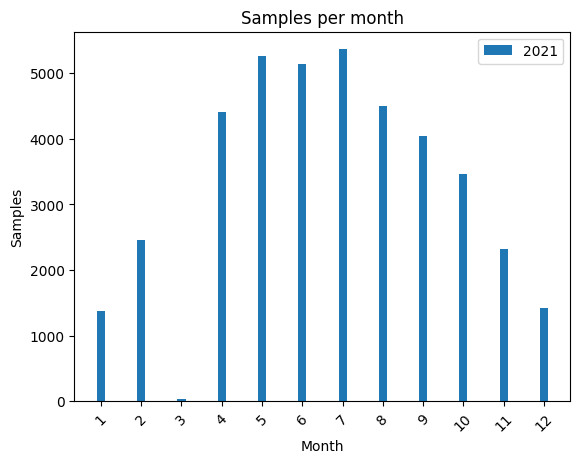

In [50]:
import matplotlib.pyplot as plt
import numpy as np

per_month = pv_data.group(['Year', 'Month'], function='count')

x_axis = np.arange(12)

for i, year in enumerate(per_month['Year'].unique()):
    plt.bar(x_axis+(i*0.2), per_month[per_month['Year']==year]['Count'], width=0.2, label = year)

plt.xticks(x_axis, per_month['Month'].unique())
plt.title('Samples per month')
plt.xlabel('Month')
plt.ylabel('Samples')
plt.tick_params(axis='x', labelrotation = 45)
plt.legend()
plt.show()

### Produkcja na dzień

In [75]:
pv_data.production()

Year  Month  Day  Avg_output      Time    Output
0    2021      1    1    0.090867  3.833333  0.348322
1    2021      1    2    0.187100  5.730278  1.072135
2    2021      1    3    0.295275  5.646667  1.667322
3    2021      1    4    0.134932  5.229722  0.705658
4    2021      1    5    0.115396  4.479722  0.516943
..    ...    ...  ...         ...       ...       ...
360  2021     12   27    0.067880  4.563056  0.309740
361  2021     12   28    0.004200  2.146944  0.009017
362  2021     12   29    0.000000  0.000000  0.000000
363  2021     12   30    0.163917  5.770000  0.945799
364  2021     12   31    0.093769  4.166667  0.390705

[365 rows x 6 columns]

### Produkcja na godzinę

In [168]:
data = pv_data.get(columns=['Year', 'Month', 'Hour', 'Day', 'PV_output'])

pv_per_hour = pd.DataFrame(data.groupby(['Year', 'Month', 'Day', 'Hour']).mean().reset_index())

pv_per_hour.head()

Year  Month  Day  Hour  PV_output
0  2020      1    1     8   0.060500
1  2020      1    1     9   0.190000
2  2020      1    1    10   0.179000
3  2020      1    1    11   0.411000
4  2020      1    1    12   0.237667

In [108]:
pv_data.samples(year=2021, month=1, day=1)

DateTime  PV_output  Year  Month  Day  Hour  Minute  Second   
0  2021-01-01 10:11:13      0.001  2021      1    1    10      11      13  \
1  2021-01-01 10:16:13      0.000  2021      1    1    10      16      13   
2  2021-01-01 10:30:01      0.043  2021      1    1    10      30       1   
3  2021-01-01 10:36:13      0.000  2021      1    1    10      36      13   
4  2021-01-01 10:40:01      0.158  2021      1    1    10      40       1   
5  2021-01-01 10:47:25      0.000  2021      1    1    10      47      25   
6  2021-01-01 10:52:25      0.120  2021      1    1    10      52      25   
7  2021-01-01 10:56:13      0.142  2021      1    1    10      56      13   
8  2021-01-01 11:01:13      0.132  2021      1    1    11       1      13   
9  2021-01-01 11:05:01      0.000  2021      1    1    11       5       1   
10 2021-01-01 11:11:13      0.097  2021      1    1    11      11      13   
11 2021-01-01 11:17:25      0.097  2021      1    1    11      17      25   
12 2021-01-01 11:20:01      0.231  2021      1    1    11      20       1   
13 2021-01-01 11:26:13      0.087  2021      1    1    11      26      13   
14 2021-01-01 11:32:25      0.097  2021      1    1    11      32      25   
15 2021-01-01 11:36:13      0.174  2021      1    1    11      36      13   
16 2021-01-01 11:41:13      0.120  2021      1    1    11      41      13   
17 2021-01-01 11:45:01      0.000  2021      1    1    11      45       1   
18 2021-01-01 11:51:13      0.194  2021      1    1    11      51      13   
19 2021-01-01 11:56:13      0.108  2021      1    1    11      56      13   
20 2021-01-01 12:00:01      0.000  2021      1    1    12       0       1   
21 2021-01-01 12:07:25      0.170  2021      1    1    12       7      25   
22 2021-01-01 12:10:01      0.000  2021      1    1    12      10       1   
23 2021-01-01 12:16:13      0.194  2021      1    1    12      16      13   
24 2021-01-01 12:21:13      0.108  2021      1    1    12      21      13   
25 2021-01-01 12:25:01      0.174  2021      1    1    12      25       1   
26 2021-01-01 12:31:13      0.097  2021      1    1    12      31      13   
27 2021-01-01 12:35:01      0.158  2021      1    1    12      35       1   
28 2021-01-01 12:42:25      0.081  2021      1    1    12      42      25   
29 2021-01-01 12:45:01      0.000  2021      1    1    12      45       1   
30 2021-01-01 12:50:01      0.108  2021      1    1    12      50       1   
31 2021-01-01 12:56:13      0.097  2021      1    1    12      56      13   
32 2021-01-01 13:02:25      0.106  2021      1    1    13       2      25   
33 2021-01-01 13:05:01      0.000  2021      1    1    13       5       1   
34 2021-01-01 13:11:13      0.194  2021      1    1    13      11      13   
35 2021-01-01 13:17:25      0.087  2021      1    1    13      17      25   
36 2021-01-01 13:22:25      0.120  2021      1    1    13      22      25   
37 2021-01-01 13:25:01      0.000  2021      1    1    13      25       1   
38 2021-01-01 13:30:01      0.132  2021      1    1    13      30       1   
39 2021-01-01 13:36:13      0.097  2021      1    1    13      36      13   
40 2021-01-01 13:40:01      0.158  2021      1    1    13      40       1   
41 2021-01-01 13:45:01      0.000  2021      1    1    13      45       1   
42 2021-01-01 13:50:01      0.120  2021      1    1    13      50       1   
43 2021-01-01 13:56:13      0.087  2021      1    1    13      56      13   
44 2021-01-01 14:01:13      0.000  2021      1    1    14       1      13   

          Date      Time  Plot_time  
0   2021-01-01  10:11:13      36673  
1   2021-01-01  10:16:13      36973  
2   2021-01-01  10:30:01      37801  
3   2021-01-01  10:36:13      38173  
4   2021-01-01  10:40:01      38401  
5   2021-01-01  10:47:25      38845  
6   2021-01-01  10:52:25      39145  
7   2021-01-01  10:56:13      39373  
8   2021-01-01  11:01:13      39673  
9   2021-01-01  11:05:01      39901  
10  2021-01-01  11:11:13      40273  
11  2021-01-01 

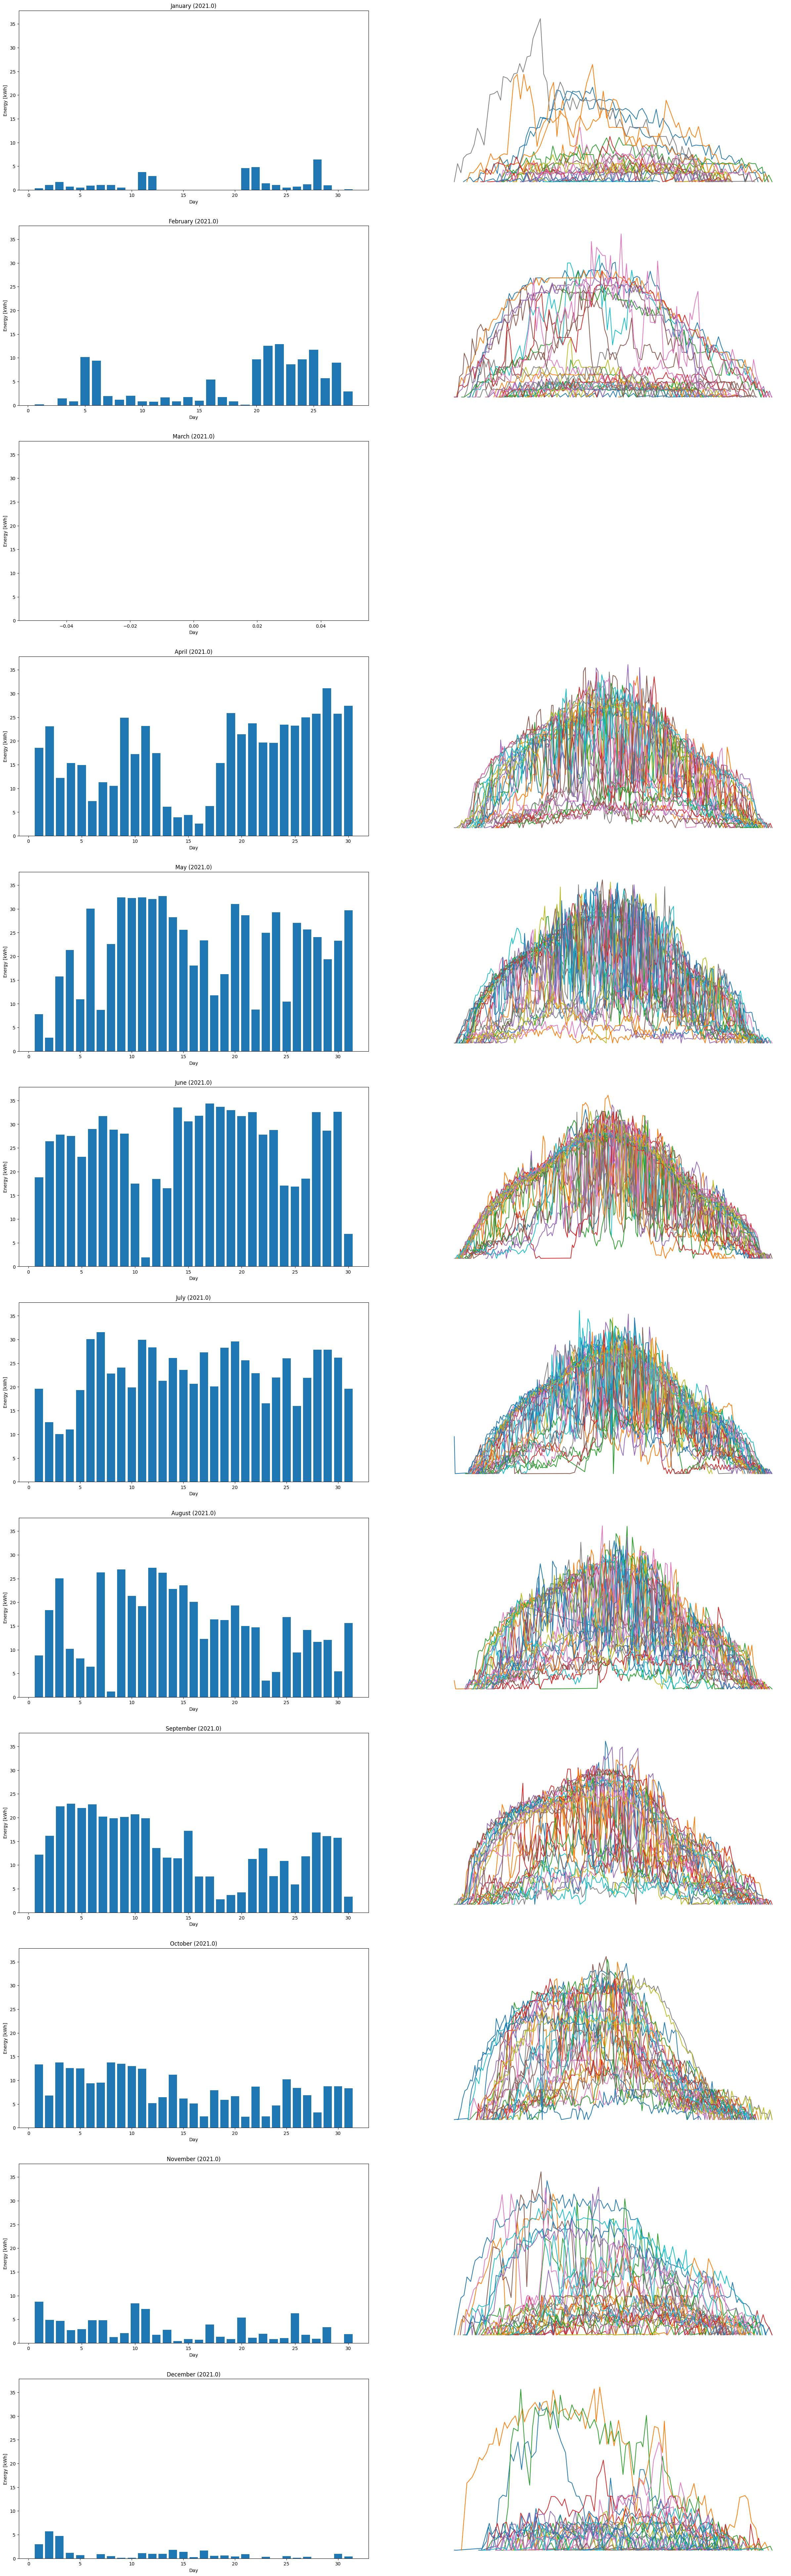

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, pv_data.nmb_of_years * 100))

for index, row in pv_data.group(['Year', 'Month'], function='sum').iterrows():
    month, year = row['Month'], row['Year']
    month_samples = pv_data.production(year=year, month=month)
    
    # Production per day
    plt.subplot(pv_data.nmb_of_months, 2, (2 * index) + 1)
    plt.bar(month_samples['Day'], month_samples['Output'])
    plt.ylim(0, 1.1 * pv_data.max_production)
    plt.title(f"{pv_data.month_names[month]} ({year})")
    plt.xlabel('Day')
    plt.ylabel('Energy [kWh]')

    # Samples in month
    plt.subplot(pv_data.nmb_of_months, 2, (2 * index) + 2)
    for day in month_samples['Day']:
        day_samples = pv_data.samples(year=year, month=month, day=day)
        
        if(len(day_samples) > 0):
            plt.plot(day_samples['Plot_time'], day_samples['PV_output'])
            plt.axis('off')

### Produkcja miesięczna


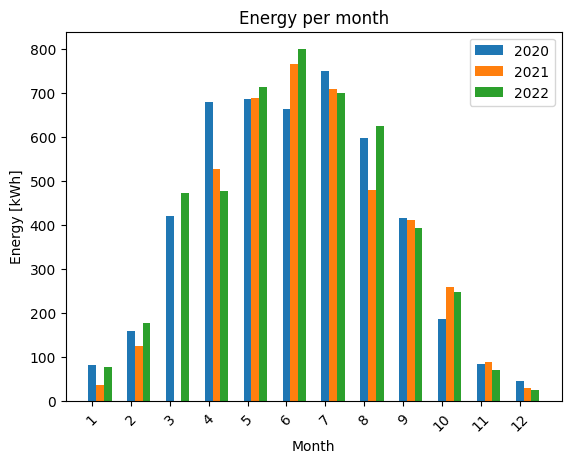

In [132]:
per_month = pd.DataFrame(per_day[['Year', 'Month', 'Time', 'Output']].groupby(['Year', 'Month']).sum().reset_index())

per_month['Date'] = per_month.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)

x_axis = np.arange(12)

for i, year in enumerate(per_month['Year'].unique()):
    plt.bar(x_axis+(i*0.2), per_month[per_month['Year']==year]['Output'], width=0.2, label = year)

plt.xticks(x_axis, per_month['Month'].unique())
plt.title('Energy per month')
plt.xlabel('Month')
plt.ylabel('Energy [kWh]')
plt.tick_params(axis='x', labelrotation = 45)
plt.legend()
plt.show()

### Wczytanie danych pogodowych

|Atrybut|Opis|Zakres|
|-|-|-|
|PeriodEnd|Koniec okresu pomiarowego|-|
|PeriodStart|Początek okresu pomiarowego|-|
|AirTemp|Temperatura powietrza 2 metry powyżej gruntu|-|
|Azimuth|Kąt azymutu słonecznego|Od -180 do 180|
|CloudOpacity|Tłumienie wpadającego światła słonecznego z powodu zachmurzenia|0(brak chmur)-100(pełne tłumienie)|
|DewpointTemp|Temperatura punktu rosy 2 metry nad poziomem gruntu|-|
|DHI|(Direct Horizontal Irradiance) Rozproszone natężenie promieniowania padające na poziomą powierzchnię|-|
|DNI|(Direct Normal Irradiance) Rozproszone natężenie promieniowania padające na poziomą powierzchnię|-|
|Ebh|Bezpośrednie natężenie promieniowania (dochodzące w linii prostej od słońca) otrzymane na poziomej powierzchni|-|
|GHI|(Global Horizontal Irradiance) Całkowite natężenie promieniowania padającego na poziomą powierzchnię. Jest to suma bezpośrednich i rozproszonych składowych promieniowania padającego na poziomą powierzchnię|-|
|PrecipitableWater|Woda opadowa całej kolumny atmosferycznej|-|
|RelativeHumidity|Wilgotność względna powietrza 2 metry nad poziomem gruntu|-|
|SnowWater|Miara fizycznej pokrywy śnieżnej na ziemi, mierzona w centymetrach.|-|
|SurfacePressure|Ciśnienie powietrza na poziomie gruntu|-|
|WindDirection10m|Kierunek wiatru na wysokości 10 metrów nad poziomem gruntu|0(północ)-270(zachód)|
|WindSpeed10m|Prędkość wiatru 10 metrów nad poziomem gruntu|-|
|Zenith|Kąt między linią prostopadłą do powierzchni ziemi a słońcem|0(słońce nad głową)
|AlbedoDaily|Średni dzienny współczynnik odbicia światła widzialnego od powierzchni|0(pełna absorpcja)-1(pełne odbicie)|
|Gti|Całkowite natężenie promieniowania padające na powierzchnię o określonym nachyleniu|



In [173]:
import pandas as pd

weather = pd.read_csv('data/100343/weather.csv')

weather.head()

PeriodEnd           PeriodStart  AirTemp  Azimuth  CloudOpacity  \
0  2019-12-31T00:05:00Z  2019-12-31T00:00:00Z      4.9      -37           0.0   
1  2019-12-31T00:10:00Z  2019-12-31T00:05:00Z      4.9      -39           0.0   
2  2019-12-31T00:15:00Z  2019-12-31T00:10:00Z      4.9      -41           0.0   
3  2019-12-31T00:20:00Z  2019-12-31T00:15:00Z      4.9      -43           0.0   
4  2019-12-31T00:25:00Z  2019-12-31T00:20:00Z      4.9      -44           0.0   

   DewpointTemp  Dhi  Dni  Ebh  Ghi  GtiFixedTilt  GtiTracking  \
0          -6.4    0    0    0    0             0            0   
1          -6.4    0    0    0    0             0            0   
2          -6.4    0    0    0    0             0            0   
3          -6.4    0    0    0    0             0            0   
4          -6.4    0    0    0    0             0            0   

   PrecipitableWater  RelativeHumidity  SnowWater  SurfacePressure  \
0                8.6              43.8        0.0           1005.9   
1                8.6              43.9        0.0           1005.9   
2                8.6              43.9        0.0           1005.8   
3                8.7              43.9        0.0           1005.8   
4                8.7              43.9        0.0           1005.7   

   WindDirection10m  WindSpeed10m  Zenith  AlbedoDaily  
0               253           6.7     147         0.17  
1               253           6.7     146         0.17  
2               253           6.7     146         0.17  
3               253           6.7     145         0.17  
4               253           6.7     145         0.17

In [175]:
weather['PeriodEnd'] = pd.to_datetime(weather['PeriodEnd'])
weather['PeriodStart'] = pd.to_datetime(weather['PeriodStart'])


weather['Year'] = weather['PeriodStart'].dt.year
weather['Month'] = weather['PeriodStart'].dt.month
weather['Day'] = weather['PeriodStart'].dt.day
weather['Hour'] = weather['PeriodStart'].dt.hour
weather['Minute'] = weather['PeriodStart'].dt.minute
weather['Second'] = weather['PeriodStart'].dt.second
weather['Date'] = weather['PeriodStart'].dt.date
weather['Time'] = weather['PeriodStart'].dt.time
weather.head()

PeriodEnd               PeriodStart  AirTemp  Azimuth  \
0 2019-12-31 00:05:00+00:00 2019-12-31 00:00:00+00:00      4.9      -37   
1 2019-12-31 00:10:00+00:00 2019-12-31 00:05:00+00:00      4.9      -39   
2 2019-12-31 00:15:00+00:00 2019-12-31 00:10:00+00:00      4.9      -41   
3 2019-12-31 00:20:00+00:00 2019-12-31 00:15:00+00:00      4.9      -43   
4 2019-12-31 00:25:00+00:00 2019-12-31 00:20:00+00:00      4.9      -44   

   CloudOpacity  DewpointTemp  Dhi  Dni  Ebh  Ghi  ...  Zenith  AlbedoDaily  \
0           0.0          -6.4    0    0    0    0  ...     147         0.17   
1           0.0          -6.4    0    0    0    0  ...     146         0.17   
2           0.0          -6.4    0    0    0    0  ...     146         0.17   
3           0.0          -6.4    0    0    0    0  ...     145         0.17   
4           0.0          -6.4    0    0    0    0  ...     145         0.17   

   Year  Month  Day  Hour  Minute  Second        Date      Time  
0  2019     12   31     0       0       0  2019-12-31  00:00:00  
1  2019     12   31     0       5       0  2019-12-31  00:05:00  
2  2019     12   31     0      10       0  2019-12-31  00:10:00  
3  2019     12   31     0      15       0  2019-12-31  00:15:00  
4  2019     12   31     0      20       0  2019-12-31  00:20:00  

[5 rows x 28 columns]

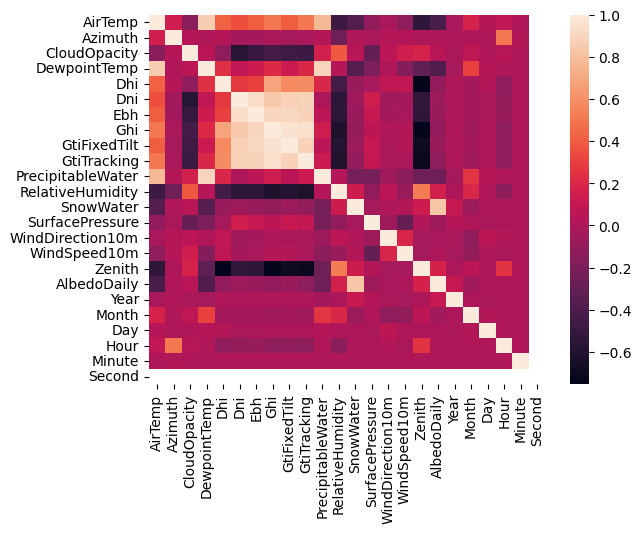

In [192]:
import seaborn as sns

sns.heatmap(weather.corr(numeric_only=True))

plt.show()

### Wybranie tylko potrzebnych danych pogodowych

#### Pierwszy dzień każdego miesiąca

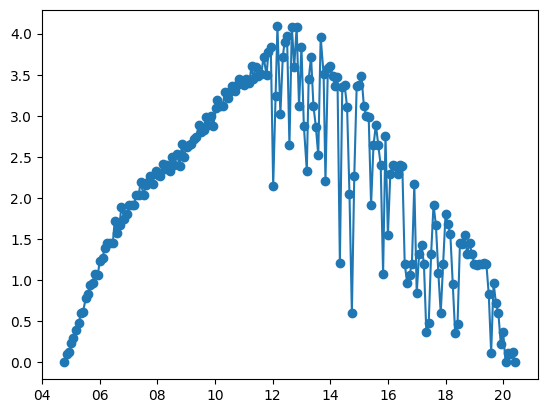

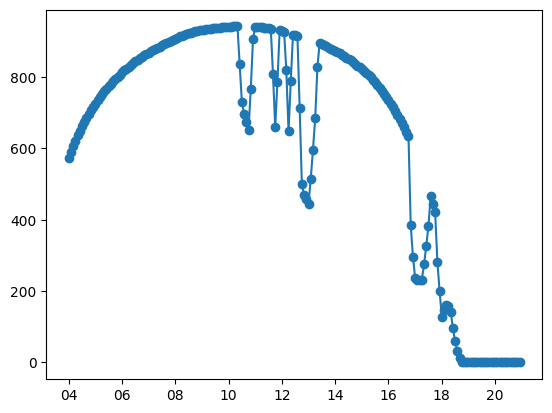

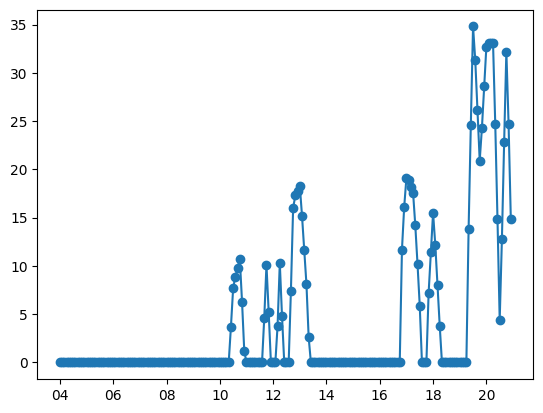

In [204]:
import matplotlib.dates as dts
from matplotlib import dates as mpl_dates

samples = pv_data.get(columns=['DateTime','Year', 'Month', 'Day', 'Hour', 'PV_output'])
day_samples = samples[(samples['Year'] == 2021) & (samples['Month'] == 6) & (samples['Day'] == 14)]
day_weather_samples = weather[(weather['Year'] == 2021) & (weather['Month'] == 6) & (weather['Day'] == 14)]

day_weather_samples = day_weather_samples[(day_weather_samples['PeriodStart'].dt.hour >= day_samples['Hour'].min()) &  (day_weather_samples['PeriodStart'].dt.hour <= day_samples['Hour'].max())]
date_format = mpl_dates.DateFormatter('%H')
plt.gca().xaxis.set_major_formatter(date_format)
plt.plot_date(dts.date2num(day_samples['DateTime']), day_samples['PV_output'], linestyle = 'solid')
plt.show()

date_format = mpl_dates.DateFormatter('%H')
plt.gca().xaxis.set_major_formatter(date_format)

plt.plot_date(dts.date2num(day_weather_samples['PeriodStart']), day_weather_samples['Dni'], linestyle = 'solid')
plt.show()

date_format = mpl_dates.DateFormatter('%H')
plt.gca().xaxis.set_major_formatter(date_format)

plt.plot_date(dts.date2num(day_weather_samples['PeriodStart']), day_weather_samples['CloudOpacity'], linestyle = 'solid')
plt.show()


### Bibliografia
* https://pvmonitor.pl//i_user.php?idinst=100343&od=2022-01-02&do=2022-01-02#/sumapv
* https://www.kaggle.com/code/pythonafroz/solar-power-generation-forecast-with-99-auc/notebook